## Imports

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np
import os
from mlutils.dataframes import *
from mlutils.preprocessing import *
from mlutils.plot import *

## Loading Data

In [7]:
%%time
# load just a quick sample and let pandas figure out types
df_sample = pd.read_csv('data/Train.csv', nrows=100)

CPU times: user 0 ns, sys: 4.11 ms, total: 4.11 ms
Wall time: 3.93 ms


In [8]:
display_all(df_sample.head(), transpose=True)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [9]:
df_sample.dtypes

SalesID                      int64
SalePrice                    int64
MachineID                    int64
ModelID                      int64
datasource                   int64
auctioneerID                 int64
YearMade                     int64
MachineHoursCurrentMeter     int64
UsageBand                   object
saledate                    object
fiModelDesc                 object
fiBaseModel                 object
fiSecondaryDesc             object
fiModelSeries               object
fiModelDescriptor           object
ProductSize                 object
fiProductClassDesc          object
state                       object
ProductGroup                object
ProductGroupDesc            object
Drive_System                object
Enclosure                   object
Forks                       object
Pad_Type                    object
Ride_Control                object
Stick                       object
Transmission                object
Turbocharged                object
Blade_Extension     

In [10]:
# seems date was not correctly interpreted. We can convert it here
df_sample.saledate = pd.to_datetime(df_sample.saledate)

In [11]:
%%time
# or let's read the entire dataset specifying the parse_dates parameter
df_raw = pd.read_csv('data/Train.csv', parse_dates=['saledate'], low_memory=False)

CPU times: user 27.8 s, sys: 156 ms, total: 27.9 s
Wall time: 26.9 s


## Looking at Dataframe size

In [12]:
df_raw.shape

(401125, 53)

In [13]:
display_mem_usage(df_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

## Preprocessing

In [14]:
# In this case the metric is RMSLE (root mean squared log error).
# Therefore, we turn SalePrice (label) to log and just use RMSE as usual
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Using datetime values

In [16]:
add_date_features(df_raw, 'saledate')
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [17]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

### Creating categorical columns

In [18]:
# now we need to turn all strings into categorical columns
create_categories(df_raw)

In [19]:
# here's an example
df_raw.UsageBand.head()

0       Low
1       Low
2      High
3      High
4    Medium
Name: UsageBand, dtype: category
Categories (3, object): [High < Low < Medium]

In [20]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [21]:
# -1 mean missing value
df_raw.UsageBand.cat.codes.value_counts()

-1    331486
 2     33985
 1     23620
 0     12034
dtype: int64

In [22]:
# we can also sort the order if we like
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [23]:
df_raw.UsageBand.cat.codes.head()

0    2
1    2
2    0
3    0
4    1
dtype: int8

### Saving pre-processing in feather format

In [24]:
os.makedirs('tmp', exist_ok=True)
%time df_raw.to_feather('tmp/bulldozers-raw')

CPU times: user 127 ms, sys: 64.4 ms, total: 191 ms
Wall time: 214 ms


In [25]:
import feather
%time df_raw = feather.read_dataframe('tmp/bulldozers-raw')

CPU times: user 136 ms, sys: 7.86 ms, total: 144 ms
Wall time: 36.5 ms


In [26]:
!ls -lh tmp

total 67M
-rw-r--r-- 1 quick quick 67M jan 21 19:06 bulldozers-raw
-rw-r--r-- 1 quick quick 688 nov 30 17:57 keep_cols.npy
-rw-r--r-- 1 quick quick 667 nov 29 19:11 subs_cols.npy


In [27]:
!ls -lh data

total 112M
drwxr-xr-x 4 quick quick 4,0K jun 26  2011 aclImdb
drwxr-xr-x 3 quick quick 4,0K nov 29 16:17 mnist
drwxr-xr-x 2 quick quick 4,0K nov 30 10:05 rossman
-rw-r--r-- 1 quick quick 112M jan 24  2013 Train.csv


In [28]:
# notice how we reduced the mem usage from 791 MB to just 64 MB
display_mem_usage(df_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null category
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
state                       401125 non-null category
ProductGr

### Handling missing values

In [30]:
# let's check if we still have missing values
detect_missing(df_raw)

,Total,Percent
Pushblock,375906,0.937129
Blade_Extension,375906,0.937129
Blade_Width,375906,0.937129
Enclosure_Type,375906,0.937129
Engine_Horsepower,375906,0.937129
Tip_Control,375906,0.937129
Scarifier,375895,0.937102
Grouser_Tracks,357763,0.891899
Hydraulics_Flow,357763,0.891899
Coupler_System,357667,0.891660


In [31]:
# simple prep
df, y, nas = process_dataframe(df_raw, 'SalePrice')

In [33]:
detect_missing(df)

,Total,Percent


## Train a RandomForest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from mlutils.models.regression import *

m = RandomForestRegressor(n_jobs=-1)

In [36]:
%%time
train_regressor(m, df, y)

  R2 (Training): 0.9831221578255276
RMSE (Training): 0.00812007711751798
CPU times: user 1min 2s, sys: 583 ms, total: 1min 2s
Wall time: 9.47 s


In [37]:
%%time
# obviously the RMSE can't be trusted so let's look at the cross validation scores.
train_regressor_cv(m, df, y)

R2 Score on training set:  0.9830574571483124
Training RMSE score using 5-fold crossvalidation:  0.3132274080898991
CPU times: user 1min 11s, sys: 1.8 s, total: 1min 13s
Wall time: 50.5 s


### Create Validation set

In [39]:
# this took a while, so let's do a simpler approach to iterate quickly
n_val = 12000
n_train = len(df) - n_val
X_train, X_val = split_dataset(df, n_train)
y_train, y_val = split_dataset(y, n_train)

In [40]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((389125, 66), (12000, 66), (389125,), (12000,))

In [41]:
# let's repeat training on the train set
%time train_regressor(m, X_train, y_train)

  R2 (Training): 0.982969205231345
RMSE (Training): 0.008148920659201997
CPU times: user 1min 2s, sys: 620 ms, total: 1min 2s
Wall time: 9.64 s


In [42]:
# check scores on our validation set
predict_and_evaluate_regressor(m, X_val, y_val)

             R2: 0.89010
           RMSE: 0.24807


(array([9.16561624, 9.1146419 , 9.24548764, ..., 9.42502885, 9.37154804,
        9.37154804]), 0.8900981721442648, 0.24807241284416523)

That's pretty good: 0.25 would be enough to get us a very good score on Kaggle. However, looking at the R2 scores of train vs validation means we are overfitting 

## Tuning our tree

### Iterating quickly - creating a small subset of data

In [44]:
# get just a subset of data, create new training set from it
df_trn, y_trn, nas = process_dataframe(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_dataset(df_trn, 20000)
y_train, _ = split_dataset(y_trn, 20000)

In [45]:
m = RandomForestRegressor(n_jobs=-1)
%time train_regressor(m, X_train, y_train)

  R2 (Training): 0.9719931062538739
RMSE (Training): 0.01322644613956631
CPU times: user 2.36 s, sys: 3.67 ms, total: 2.36 s
Wall time: 708 ms


In [46]:
predict_and_evaluate_regressor(m, X_val, y_val)

             R2: 0.77646
           RMSE: 0.35380


(array([9.37457585, 9.54177159, 9.54517788, ..., 9.49674349, 9.28765435,
        9.28765435]), 0.7764595735828252, 0.35379692220950854)

### Using a single shallow tree to visualize features

In [47]:
# we don't allow the tree to grow much through the max_depth parameter
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
train_regressor(m, X_train, y_train)
predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.4061360137816923
RMSE (Training): 0.28045630833412305
             R2: 0.39756
           RMSE: 0.58081


(array([10.5963539 , 10.5963539 , 10.01899488, ..., 10.5963539 ,
        10.5963539 , 10.5963539 ]), 0.3975615355781946, 0.5808076920981888)

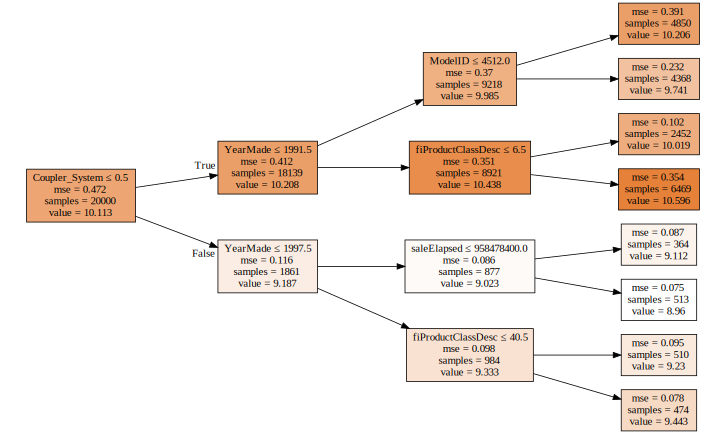

In [48]:
from mlutils.models.trees import draw_tree
draw_tree(m.estimators_[0], df_trn, precision=3)

### Allowing the tree to grow unchecked

In [49]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
train_regressor(m, X_train, y_train)
_ = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9999999999788971
RMSE (Training): 9.966004519080098e-12
             R2: 0.49762
           RMSE: 0.53038


The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results.

### How many estimators do we need?

In [50]:
m = RandomForestRegressor(n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9724125359254311
RMSE (Training): 0.013028367623238344
             R2: 0.78279
           RMSE: 0.34875


In [51]:
# grabbing predictions for each tree in the forest
preds = np.stack([t.predict(X_val) for t in m.estimators_])

print("All predictions:\n", preds[:,0])
print()
print("  Mean prediction:", np.mean(preds[:,0]))
print("Forest prediction:", m_preds[0])
print("     Actual value:", y_val[0])


All predictions:
 [8.9226583  9.25913054 9.23503298 9.40919123 9.54681261 9.51044496
 9.30565055 9.30565055 9.21034037 9.25913054]

  Mean prediction: 9.296404263566467
Forest prediction: [9.29640426 9.62226885 9.18366244 ... 9.53878643 9.3933657  9.3933657 ]
     Actual value: 9.104979856318357


Notice the forest prediction is the same as the mean of all estimator's predictions

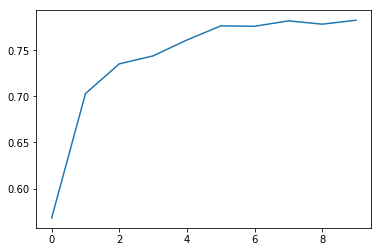

In [52]:
from mlutils.models.trees import *
analyze_estimators_growth_r2(m, X_val, y_val)

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [53]:
# the current model used 10 trees (default)
len(m.estimators_)

10

In [54]:
# try 20 trees
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.97736184981931
RMSE (Training): 0.010691020460122363
             R2: 0.79060
           RMSE: 0.34243


In [55]:
# try 40 trees
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9793375617713351
RMSE (Training): 0.009757977047395784
             R2: 0.78717
           RMSE: 0.34522


In [56]:
# try 80 trees
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9806831966091528
RMSE (Training): 0.00912249183910199
             R2: 0.80044
           RMSE: 0.33428


Notice how RMSE and R2 seem to improve very slowly

### Are we overfitting?

In [57]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9807768622192105
RMSE (Training): 0.009078257617421148
      OOB Score: 0.8601935003137007
             R2: 0.79993
           RMSE: 0.33471


As the OOB_Score is higher than R2 score but lower than training set R2, this means that we are both overfitting and also the validation set has some uniqueness to it

### Let's combat overfitting - subsampling

In [60]:
# go back to the full dataset
df_trn, y_trn, nas = process_dataframe(df_raw, 'SalePrice')
X_train, X_va = split_dataset(df_trn, n_train)
y_train, y_val = split_dataset(y_trn, n_train)

In [61]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((389125, 66), (12000, 66), (389125,), (12000,))

In [62]:
# Changes Scikit learn's random forests to give each tree a random sample of n random rows
from mlutils.models.trees import set_rf_samples, reset_rf_samples, dectree_max_depth

set_rf_samples(20000)

In [63]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.8785324059261287
RMSE (Training): 0.05811999969572202
      OOB Score: 0.8658315863342676
             R2: 0.85915
           RMSE: 0.28084


Because each tree is only seeing a fraction of the data, increasing the number of trees might be useful here

In [64]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.8945381175753936
RMSE (Training): 0.050461562371118755
             R2: 0.87954
           RMSE: 0.25972


### Let's combat overfitting - tree parameters

In [65]:
# go back to full tree training
reset_rf_samples()

In [66]:
# establish baseline
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9872056644077116
RMSE (Training): 0.006121853210318255
      OOB Score: 0.9085244145080662
             R2: 0.90010
           RMSE: 0.23651


In [67]:
# let's see how deep the trees are
t=m.estimators_[0].tree_
dectree_max_depth(t)

44

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [68]:
# adjusting min_samples_leaf
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9586049262284754
RMSE (Training): 0.019806778041081868
      OOB Score: 0.9069991450642778
             R2: 0.90263
           RMSE: 0.23351


In [69]:
# let's see how deep the trees are now
t=m.estimators_[0].tree_
dectree_max_depth(t)

40

In [70]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9723074831612293
RMSE (Training): 0.01325035769840235
      OOB Score: 0.9084447961783421
             R2: 0.90199
           RMSE: 0.23427


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

In [71]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
train_regressor(m, X_train, y_train)
m_preds = predict_and_evaluate_regressor(m, X_val, y_val)

  R2 (Training): 0.9702757580611886
RMSE (Training): 0.014222500623406183
      OOB Score: 0.9116202121863186
             R2: 0.90730
           RMSE: 0.22783
